# Neural Network for Surface Roughness Prediction without using any Libraries

In [1]:
# Loading Necessary packages 

import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # visualization
import matplotlib.pyplot as plt


# Load Data

In [2]:
# Reading data
data = pd.read_excel('Data.xlsx')
data.sample(n=5)

,Current,Pulse on Time,Wheel Speed,Depth of Cut,Surface Roughness
21,6,11.0,15,0.38,0.3983
74,5,11.0,35,0.43,0.6485
80,4,11.0,20,0.36,0.3569
44,4,7.6,20,0.38,0.2654
69,5,11.0,20,0.38,0.4223


In [3]:
data.describe()

,Current,Pulse on Time,Wheel Speed,Depth of Cut,Surface Roughness
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,5.000000,13.866667,23.148148,0.390000,0.464658
std,0.821584,6.646879,8.457410,0.029623,0.126050
min,4.000000,7.600000,15.000000,0.360000,0.209200
25%,4.000000,7.600000,15.000000,0.360000,0.375800
50%,5.000000,11.000000,20.000000,0.380000,0.454600
75%,6.000000,23.000000,35.000000,0.430000,0.548000
max,6.000000,23.000000,35.000000,0.430000,0.699200


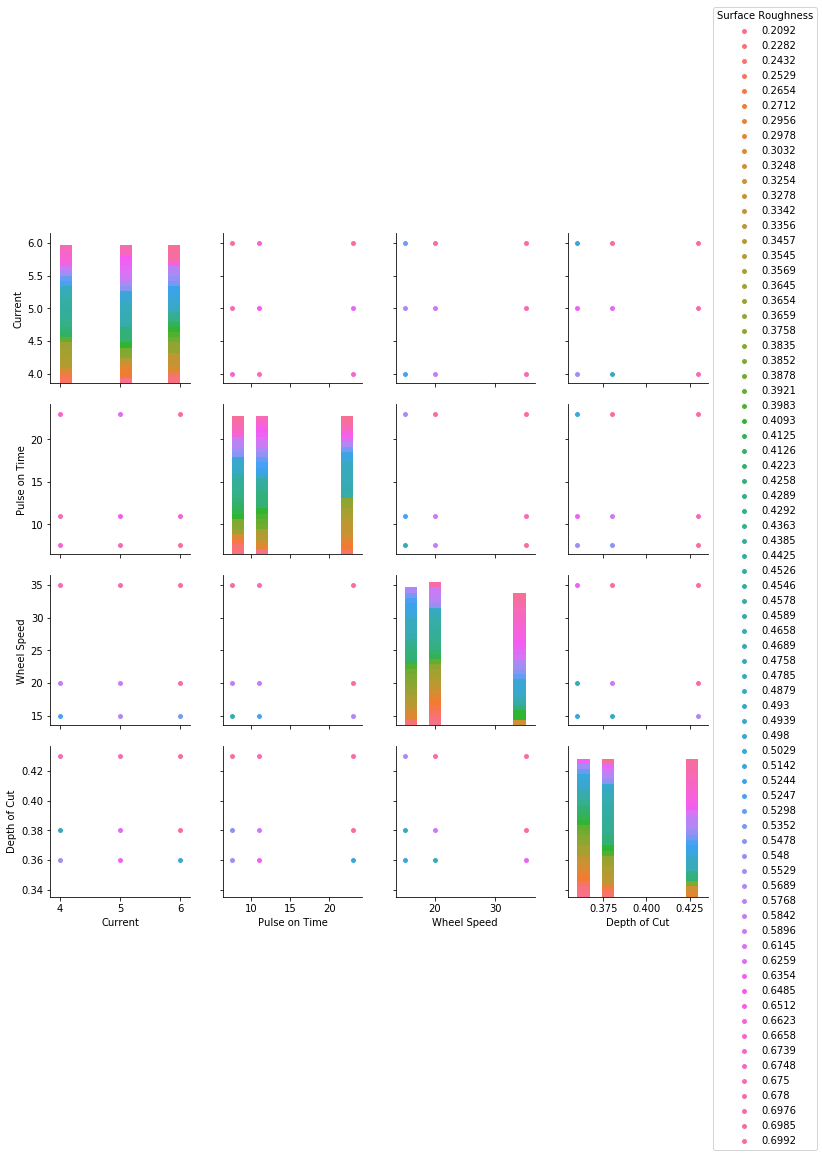

In [4]:
sns.pairplot( data=data, vars=('Current','Pulse on Time','Wheel Speed','Depth of Cut'), hue='Surface Roughness' )
plt.savefig('Figure', dpi = 300)

# Normalize the Data

In [5]:
df_norm = data[['Current', 'Pulse on Time', 'Wheel Speed', 'Depth of Cut']].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))
df_norm.sample(n=5)

,Current,Pulse on Time,Wheel Speed,Depth of Cut
51,0.0,0.593074,-0.157407,-0.428571
43,0.5,-0.186147,-0.407407,0.571429
60,-0.5,-0.406926,0.592593,0.571429
74,0.0,-0.186147,0.592593,0.571429
35,0.0,-0.406926,0.592593,-0.142857


In [6]:
target = data[['Surface Roughness']]
target.sample(5)

,Surface Roughness
45,0.2956
14,0.6780
46,0.3278
64,0.3457
74,0.6485


In [7]:
df = pd.concat([df_norm, target], axis = 1)
df.sample(5)
df.shape

(81, 5)

# Seperating the Train Data and Test Data

In [8]:
train_test_per = 0.8
train_data = df.iloc[:round((len(df)*train_test_per)), :]
train_data.shape

(65, 5)

In [9]:
test_data_per = 1-train_test_per
test_data = df.iloc[:round((len(df)*test_data_per)), :]
test_data.shape

(16, 5)

In [10]:
# Adding Bias Unit in Input layer for Train Data
b = np.ones((len(train_data),1)) 
b.shape

(65, 1)

In [11]:
# Adding Bias Unit in Input layer for Train Data
b_test = np.ones((len(test_data),1)) 
b_test.shape

(16, 1)

In [12]:
X = np.concatenate([b,train_data.values[:, : 4]], axis = 1)
X.shape

(65, 5)

In [13]:
X_test = np.concatenate([b_test,test_data.values[:, : 4]], axis = 1)
X_test.shape

(16, 5)

In [14]:
vec_y = train_data.values[:, 4]
y = np.reshape(vec_y, (b.shape))
y.shape

(65, 1)

In [15]:
vec_y_test = test_data.values[:, 4]
y_test = np.reshape(vec_y_test, b_test.shape)
y_test.shape

(16, 1)

# Back Propagation and seeding initial Weight

In [16]:
num_inputs = len(X[0])
hidden_layer_neurons = 5
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765],
       [-0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694],
       [ 0.55876584, -0.60462985,  0.72598647,  0.96680135, -0.67231552],
       [ 0.19466789, -0.9820278 , -0.22685743, -0.91167988,  0.91330594],
       [-0.12770671,  0.89795461,  0.57261197,  0.7325786 , -0.65366916]])

In [17]:
num_outputs = 1
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[-0.85010283],
       [ 0.20148544],
       [-0.66405563],
       [ 0.46676034],
       [-0.18311228]])

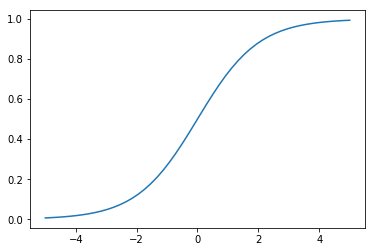

In [18]:
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

## Training the Network using Back Propagation

In [19]:
learning_rate = 0.2 # slowly update the network
for epoch in range(50000):
    a1 = 1/(1 + np.exp(-(np.dot(X, w1)))) # sigmoid function
    a2 = 1/(1 + np.exp(-(np.dot(a1, w2))))
    er = (abs(y - a2)).mean()
    a2_delta = (y - a2)*(a2 * (1-a2))
    a1_delta = a2_delta.dot(w2.T) * (a1 * (1-a1))
    w2 += a1.T.dot(a2_delta) * learning_rate
    w1 += X.T.dot(a1_delta) * learning_rate
print('Error:', er)

Error: 0.05246036943262014


In [20]:
a1 = 1/(1 + np.exp(-(np.dot(X_test, w1))))
a2 = 1/(1 + np.exp(-(np.dot(a1, w2))))

y_predicted = np.round(a2,3)
y_predicted

array([[0.372],
       [0.673],
       [0.33 ],
       [0.359],
       [0.343],
       [0.711],
       [0.485],
       [0.581],
       [0.352],
       [0.486],
       [0.629],
       [0.332],
       [0.353],
       [0.644],
       [0.35 ],
       [0.414]])

## Testing the Network

In [21]:
y_test

array([[0.5029],
       [0.6739],
       [0.3032],
       [0.2529],
       [0.2282],
       [0.6623],
       [0.4093],
       [0.5529],
       [0.4093],
       [0.4289],
       [0.6976],
       [0.2092],
       [0.2432],
       [0.678 ],
       [0.4292],
       [0.4385]])

In [22]:
compare = np.concatenate([y_test, y_predicted], axis =1)
type(compare)

numpy.ndarray

In [23]:
df2 = pd.DataFrame(compare, columns = ['y_test', 'y_predicted'])

In [24]:
df2

,y_test,y_predicted
0,0.5029,0.372
1,0.6739,0.673
2,0.3032,0.330
3,0.2529,0.359
4,0.2282,0.343
5,0.6623,0.711
6,0.4093,0.485
7,0.5529,0.581
8,0.4093,0.352
9,0.4289,0.486


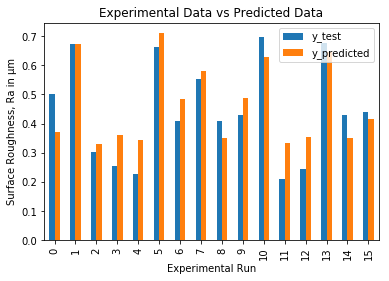

In [27]:
df2.plot.bar()
plt.ylabel('Surface Roughness, Ra in µm')
plt.xlabel('Experimental Run')
plt.title('Experimental Data vs Predicted Data')
plt.savefig('barfig', dpi = 300)